# Menstrual Cycle Analysis Dashboard

This dashboard shows:
- Average menstrual cycle length by age group
- Distribution of cycle lengths
- Summary statistics (participants, shortest/longest cycles, average age)


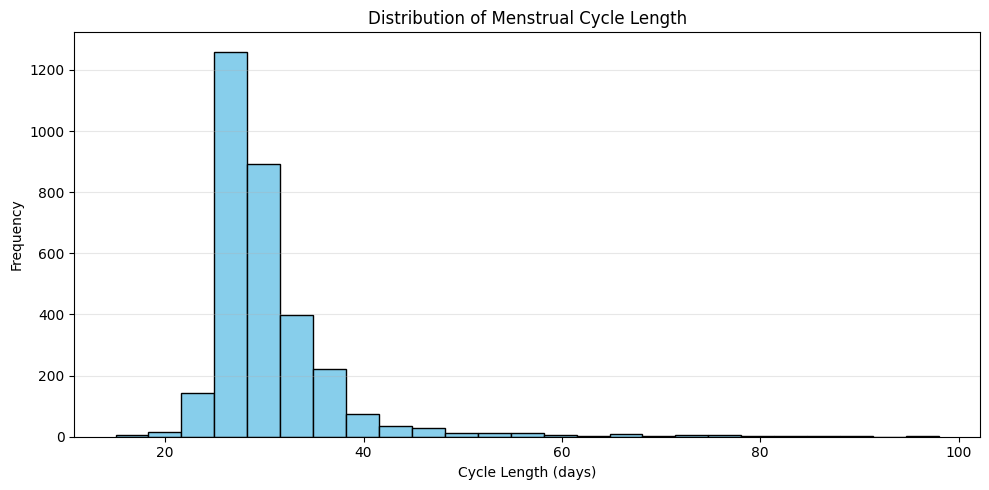

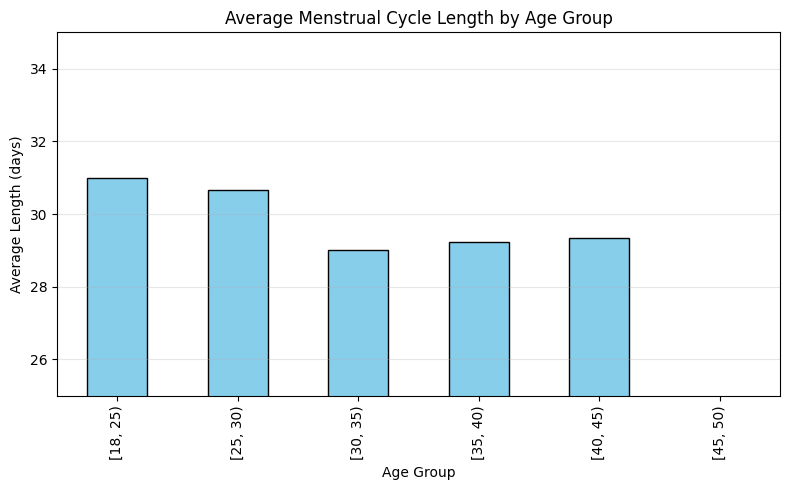


--- Dashboard Summary ---
Number of participants (unique women): 562
Shortest cycle: 15.0 days
Longest cycle: 98.0 days
Average age of participants: 27.3 years


In [2]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load dataset
df = pd.read_csv("Menstrual_cyclelength.csv")

# Step 3: Clean and prepare data
df["cycle_length"] = pd.to_numeric(df["cycle_length"], errors="coerce")
df = df.dropna(subset=["cycle_length", "age"])

# Step 4: Summary statistics
num_participants = df["new_id"].nunique()
min_cycle = df["cycle_length"].min()
max_cycle = df["cycle_length"].max()
avg_age = df["age"].mean()

# Step 5: Plot distribution of cycle length
plt.figure(figsize=(10, 5))
plt.hist(df["cycle_length"], bins=25, color="skyblue", edgecolor="black")
plt.title("Distribution of Menstrual Cycle Length")
plt.xlabel("Cycle Length (days)")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# Step 6: Group by age ranges for average cycle length
bins = [18, 25, 30, 35, 40, 45, 50]
labels = ["[18, 25)", "[25, 30)", "[30, 35)", "[35, 40)", "[40, 45)", "[45, 50)"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)
age_stats = df.groupby("age_group", observed=False)["cycle_length"].mean()

# Step 7: Bar chart of average cycle length by age group
plt.figure(figsize=(8, 5))
age_stats.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Menstrual Cycle Length by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Length (days)")
plt.ylim(25, 35)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# Step 8: Print dashboard summary
print("\n--- Dashboard Summary ---")
print(f"Number of participants (unique women): {num_participants}")
print(f"Shortest cycle: {min_cycle} days")
print(f"Longest cycle: {max_cycle} days")
print(f"Average age of participants: {avg_age:.1f} years")
